In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score


In [ ]:
train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None)
test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1].astype(int)

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1].astype(int)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


أول 5 صفوف من التدريب:
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  

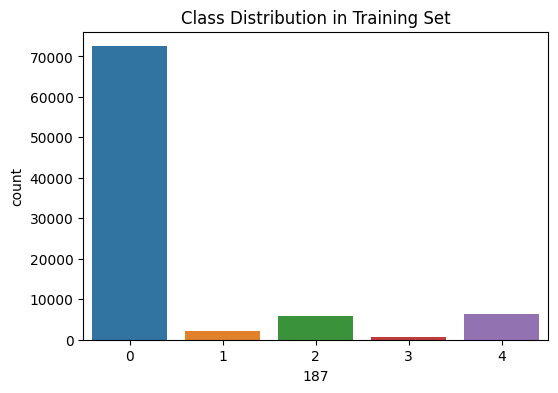

نسبة كل فئة في بيانات التدريب:
187
0    0.827729
4    0.073452
2    0.066108
1    0.025390
3    0.007321
Name: proportion, dtype: float64


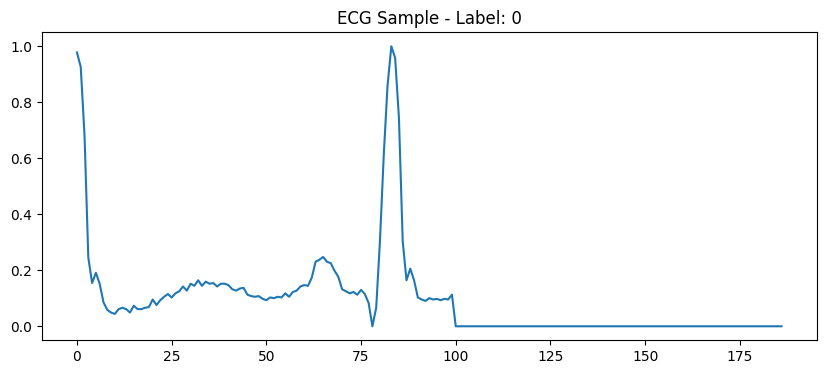

In [ ]:
print("أول 5 صفوف من التدريب:")
print(train.head())

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.show()

print("نسبة كل فئة في بيانات التدريب:")
print(y_train.value_counts(normalize=True))

plt.figure(figsize=(10,4))
plt.plot(X_train.iloc[0])
plt.title(f"ECG Sample - Label: {y_train.iloc[0]}")
plt.show()


In [ ]:
print("نسبة كل فئة في بيانات التدريب:")
print(y_train.value_counts(normalize=True))


نسبة كل فئة في بيانات التدريب:
187
0    0.827729
4    0.073452
2    0.066108
1    0.025390
3    0.007321
Name: proportion, dtype: float64


In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",  # يعوض اختلال الفئات
    random_state=42,
    n_jobs=-1
)

rf.fit(X_tr, y_tr)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     14494
           1       0.96      0.60      0.74       445
           2       0.98      0.88      0.93      1158
           3       0.96      0.61      0.75       128
           4       1.00      0.96      0.98      1286

    accuracy                           0.98     17511
   macro avg       0.98      0.81      0.88     17511
weighted avg       0.98      0.98      0.97     17511



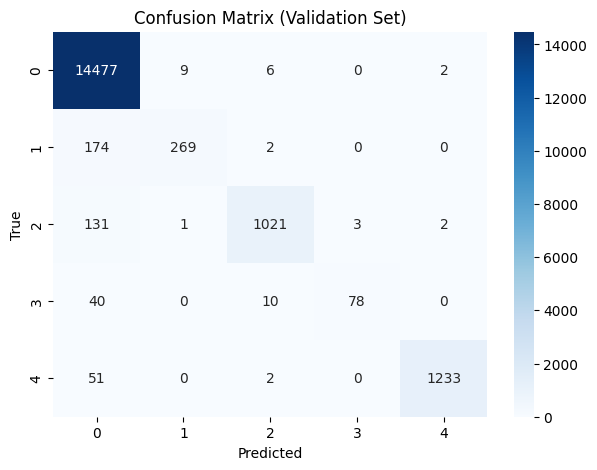

Balanced Accuracy (Validation): 0.8106351985061213


In [ ]:
y_val_pred = rf.predict(X_val)

print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

balanced_acc_val = balanced_accuracy_score(y_val, y_val_pred)
print("Balanced Accuracy (Validation):", balanced_acc_val)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18118
           1       0.97      0.57      0.72       556
           2       0.98      0.87      0.92      1448
           3       0.83      0.59      0.69       162
           4       1.00      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.79      0.86     21892
weighted avg       0.97      0.97      0.97     21892



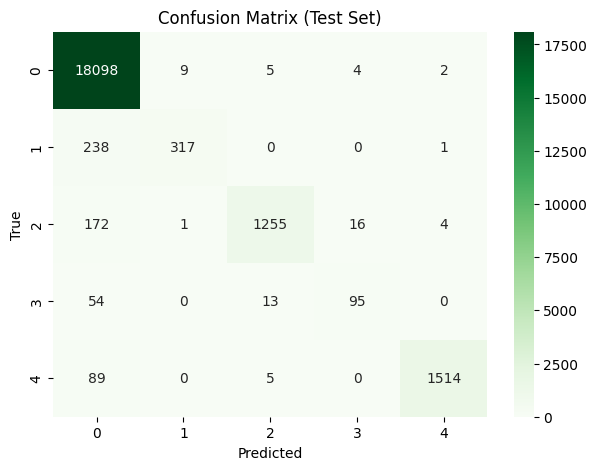

Balanced Accuracy (Test): 0.792742951823639


In [ ]:
y_test_pred = rf.predict(X_test)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)
print("Balanced Accuracy (Test):", balanced_acc_test)